<div style="width:100%; height:60px; background-color:aqua; display:flex">
<div style="display:flex; flex-direction:row; justify-content:center">
<h2 style="color:white"><strong>Random Forest</strong></h2>
</div>
</div>

<h3 style="color:white">Random forest is a commonly-used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.</h3>

<h4 style="font-style:italic">Random forests are a popular supervised machine learning algorithm.
<ul style="color:aqua">
<li>Random forests are for supervised machine learning, where there is a labeled target variable.</li>
<li>Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.</li>
<li>Random forests are an ensemble method, meaning they combine predictions from other models.</li>
<li>Each of the smaller models in the random forest ensemble is a decision tree.</li>
</ul>
</h4>

<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:50%;height:auto; background-color:white" src="/home/ahmedunix/data_Science_Work/Machine_Learning/12_Random_Forest/Ensemble-of-decision-trees.png">
<img style="width:40%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/12_Random_Forest/Random-Forest-Algorithm.webp">
</div>

<h2 style="color:white; font-weight:bold">How does Random Forest work?</h2>
<h4 style="color:white; font-style:italic"><p>Imagine you have a complex problem to solve, and you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.</p>

<p>In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. (For regression, predictions use an averaging technique instead.)</p>

<p>In the diagram below, we have a random forest with n decision trees, and we’ve shown the first 5, along with their predictions (either “Dog” or “Cat”). Each tree is exposed to a different number of features and a different sample of the original dataset, and as such, every tree can be different. Each tree makes a prediction. Looking at the first 5 trees, we can see that 4/5 predicted the sample was a Cat. The green circles indicate a hypothetical path the tree took to reach its decision. The random forest would count the number of predictions from decision trees for Cat and for Dog, and choose the most popular prediction.</p>
</h4>

<img style="width:50%; height:auto"  src="/home/ahmedunix/data_Science_Work/Machine_Learning/12_Random_Forest/random_forest_working.png">

In [14]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf, keras
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [19]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [20]:
digits.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [21]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [22]:
digits.target_names[:5]

array([0, 1, 2, 3, 4])

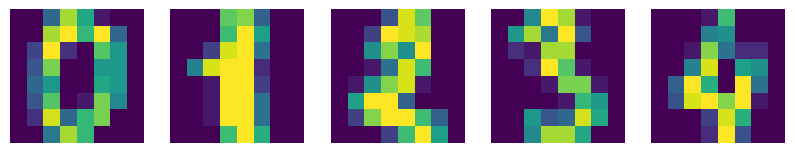

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))  # Create a row of 5 subplots

for i in range(5):
    axes[i].imshow(digits.images[i])  # Plot each image in a separate subplot
    axes[i].axis('off')  # Turn off the axis for a cleaner look

plt.show()  # Show all the images in a single plot


In [24]:
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

In [25]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [26]:
df['target'] = digits.target

In [27]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [28]:
x = df.drop(columns=['target'])
y = df.target

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [46]:
model = RandomForestClassifier(n_estimators=100)
model

RandomForestClassifier()

In [47]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_predicted = model.predict(x_test)

In [49]:
model.score(x_test,y_test)

0.9611111111111111

In [51]:
accuracy_score(y_true=y_test,y_pred=y_predicted)

0.9611111111111111

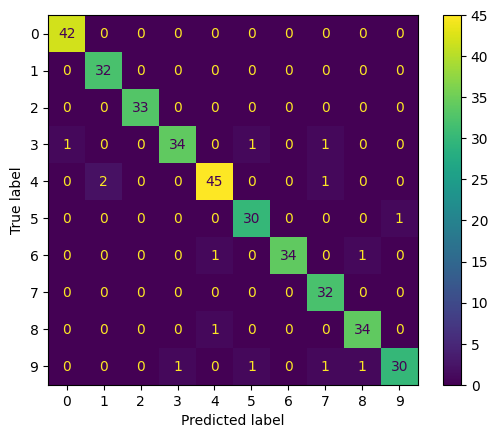

In [54]:
cm = confusion_matrix(y_true=y_test,y_pred=y_predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()